In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

#datetime.date(2021, 4, 30)
#datetime.time(15,30))

In [8]:
plt.rcParams["figure.figsize"] = (30,10)

In [9]:
df = pd.read_csv('bank_nifty.csv')

In [10]:
df['date'] = pd.to_datetime(df.date, format = '%Y-%m-%d')

df['time'] = pd.to_datetime(df.time).dt.time

df['year'] = df.date.dt.year
df['month'] = df.date.dt.month
df['day']  = df.date.dt.day


In [15]:
df['weekday'] = df.date.dt.day_name()

In [18]:
df = df.drop(['name'], axis =1)

In [19]:
df = df.drop(df.loc[(df.time > datetime.time(15,30)) | (df.time < datetime.time(9,15))].index, axis = 0)

In [24]:
df['close_fwd1'] = df.close.shift(1)

In [26]:
df = df.dropna(axis=0)

In [28]:
df['close_open'] =( (df.open - df.close_fwd1)/df.close_fwd1)*100

/var/folders/36/2w68f_916m5_4nk8vnz8j2yw0000gn/T/ipykernel_81542/604512541.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['close_open'] =( (df.open - df.close_fwd1)/df.close_fwd1)*100


In [29]:
df[(df.time == datetime.time(15,30)) |(df.time == datetime.time(9,15))]

,date,time,open,high,low,close,year,month,day,weekday,close_fwd1,close_open
389,2010-03-02,15:30:00,8944.80,8944.95,8941.35,8943.45,2010,3,2,Tuesday,8945.60,-0.008943
404,2010-03-03,09:15:00,8990.75,8990.75,8986.65,8987.95,2010,3,3,Wednesday,8943.45,0.528879
779,2010-03-03,15:30:00,9042.55,9046.40,9042.50,9044.30,2010,3,3,Wednesday,9044.35,-0.019902
794,2010-03-04,09:15:00,9059.80,9065.10,9058.80,9061.15,2010,3,4,Thursday,9044.30,0.171379
1169,2010-03-04,15:30:00,9011.95,9017.35,9011.25,9014.45,2010,3,4,Thursday,9012.85,-0.009986
...,...,...,...,...,...,...,...,...,...,...,...,...
1035872,2021-04-26,15:30:00,32256.45,32276.20,32251.85,32271.20,2021,4,26,Monday,32253.05,0.010542
1036250,2021-04-27,15:30:00,32754.30,32768.40,32740.25,32760.25,2021,4,27,Tuesday,32755.85,-0.004732
1036628,2021-04-28,15:30:00,33657.15,33666.25,33648.85,33662.65,2021,4,28,Wednesday,33660.65,-0.010398
1037006,2021-04-29,15:30:00,33654.30,33671.30,33631.55,33664.20,2021,4,29,Thursday,33651.45,0.008469


In [33]:
new_df = df[['time', 'weekday', 'close_open']].groupby(['weekday', 'time']).agg(['mean', 'std'])

In [34]:
new_df.columns

MultiIndex([('close_open', 'mean'),
            ('close_open',  'std')],
           )

In [38]:
new_df = new_df.reset_index()

In [40]:
new_df.columns

MultiIndex([(   'weekday',     ''),
            (      'time',     ''),
            ('close_open', 'mean'),
            ('close_open',  'std')],
           )

In [46]:
new_df.columns = ['weekday', 'time', 'meanof_open_close', 'std_open_close']

In [49]:
new_df[new_df.time == datetime.time(9,15)]

,weekday,time,meanof_open_close,std_open_close
0,Friday,09:15:00,0.063246,0.767857
376,Monday,09:15:00,0.200054,0.964068
1127,Thursday,09:15:00,0.128882,0.525558
1503,Tuesday,09:15:00,-0.002995,0.444783
1879,Wednesday,09:15:00,0.159676,0.643953


In [44]:
new_df[new_df[('close_open',  'std')]>2*new_df[('close_open',  'std')].std()]

KeyError: ('close_open', 'std')

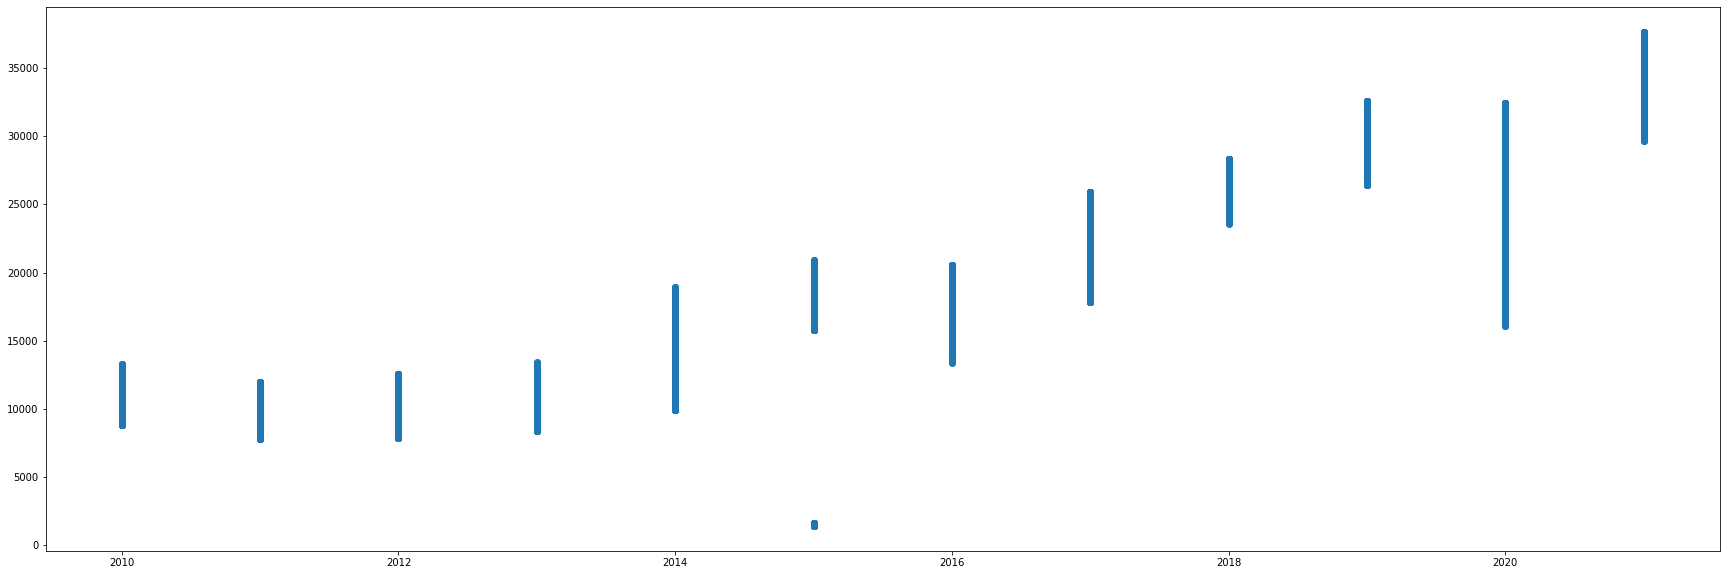

In [20]:
fig, ax = plt.subplots() 
ax.scatter(df.year, df.low)


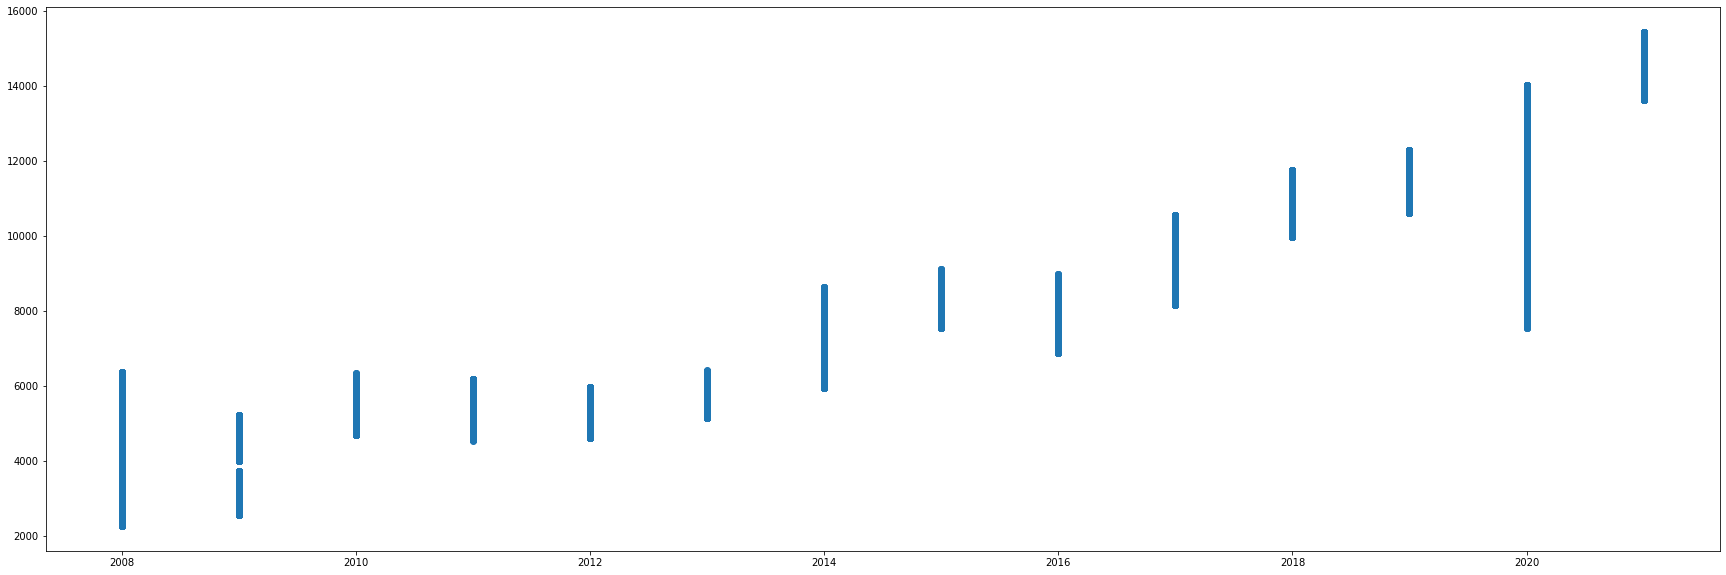

In [9]:

fig, ax = plt.subplots() 
ax.scatter(df.year, df.high)


In [10]:
df['prev_close'] = df.close.shift(1)

In [11]:
df['prev_open'] = df['open'].shift(1)
df['prev_open2'] = df['open'].shift(2)

In [12]:
df['ma30'] = df['close'].rolling(3000).mean()
df['ma100'] = df['close'].rolling(10000).mean()

In [13]:
df = df.dropna(axis=0)

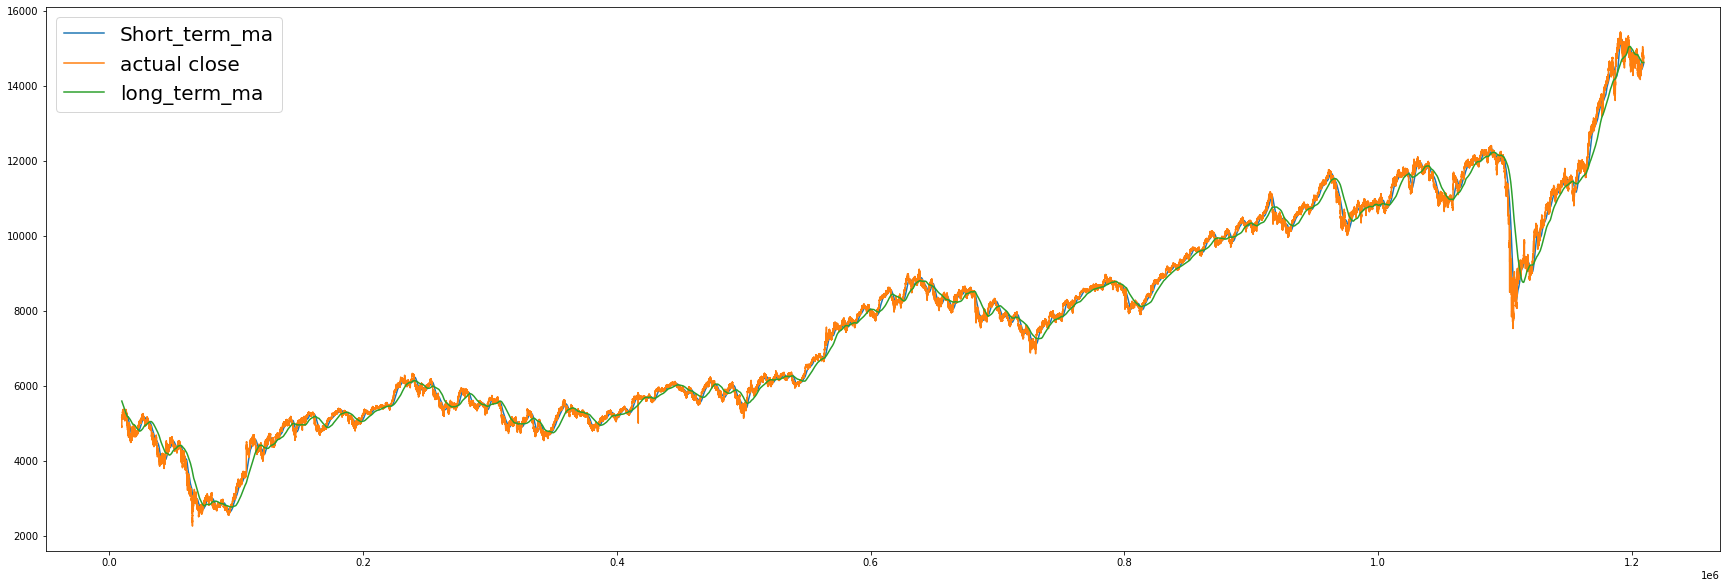

In [14]:
fig, ax = plt.subplots()
ax.plot(df.ma30, label = 'Short_term_ma')
ax.plot(df.close, label = 'actual close')
ax.plot(df.ma100, label = 'long_term_ma')
ax.legend(fontsize = 20)

In [15]:
df.corr()

,open,high,low,close,year,month,day,prev_close,prev_open,prev_open2,ma30,ma100
open,1.000000,1.000000,0.999999,0.999999,0.943933,0.001091,-0.003104,0.999999,0.999999,0.999997,0.998401,0.994130
high,1.000000,1.000000,0.999999,1.000000,0.943954,0.001071,-0.003104,0.999999,0.999998,0.999997,0.998407,0.994146
low,0.999999,0.999999,1.000000,1.000000,0.943911,0.001113,-0.003102,0.999999,0.999998,0.999996,0.998393,0.994111
close,0.999999,1.000000,1.000000,1.000000,0.943933,0.001092,-0.003104,0.999999,0.999998,0.999996,0.998400,0.994129
year,0.943933,0.943954,0.943911,0.943933,1.000000,-0.066648,-0.007677,0.943933,0.943933,0.943933,0.944589,0.945792
month,0.001091,0.001071,0.001113,0.001092,-0.066648,1.000000,0.013079,0.001090,0.001090,0.001089,-0.000525,-0.002237
day,-0.003104,-0.003104,-0.003102,-0.003104,-0.007677,0.013079,1.000000,-0.003104,-0.003104,-0.003104,-0.001195,-0.000216
prev_close,0.999999,0.999999,0.999999,0.999999,0.943933,0.001090,-0.003104,1.000000,0.999999,0.999998,0.998401,0.994130
prev_open,0.999999,0.999998,0.999998,0.999998,0.943933,0.001090,-0.003104,0.999999,1.000000,0.999999,0.998402,0.994132
prev_open2,0.999997,0.999997,0.999996,0.999996,0.943933,0.001089,-0.003104,0.999998,0.999999,1.000000,0.998404,0.994133


In [16]:
def buysell(df):
    buy = []
    sell = []
    position = False
    for i in range(len(df)):
        if df['ma30'][i]>df['ma100'][i]:
            if position == False:
                buy.append(df['close'][i])
                sell.append(np.nan)
                position = True
            else:
                buy.append(np.nan)
                sell.append(np.nan)

        elif df['ma30'][i]<df['ma100'][i]:
            if position == True:
                sell.append(df['close'][i])
                buy.append(np.nan)
                position = False
            else:
                sell.append(np.nan)
                buy.append(np.nan)

        else:
            buy.append(np.nan)
            sell.append(np.nan)
        
    return buy, sell
        

In [17]:
df.reset_index(inplace = True , drop = True)

In [18]:
buy, sell = buysell(df)

In [19]:
print(len(buy))
print(len(sell))
print(len(df))

1192107
1192107
1192107


In [20]:
buydf = pd.DataFrame({'buy':buy, 'sell':sell})
buydf

,buy,sell
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
...,...,...
1192102,NaN,NaN
1192103,NaN,NaN
1192104,NaN,NaN
1192105,NaN,NaN


In [26]:
buydf[not buydf.isna()]

ValueError: The truth value of a DataFrame is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().